# Ejemplo sección 5.8. Función de tensión de Airy

## Cálculo de los esfuerzos, deformaciones y desplazamientos en una viga utilizando la función de tensión de Airy

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Juan Nicolás Ramirez, <jnramirezg@unal.edu.co> | Marzo 8, 2023 | Conversión de código de MAXIMA a Python|
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Marzo 8, 2022 | Completando la información del código|

Antes de continuar, se solicita al lector leer de nuevo las dos primeras páginas de la Sección <font color='blue'>4.9</font> para mayor provecho de las explicaciones. Consideremos la viga mostrada en la Figura <font color='blue'>4.19</font>, la cual soporta sobre su cara inferior una carga uniformemente distribuida de magnitud $q$. De dicha viga, se desean calcular analíticamente los esfuerzos $\sigma_x$, $\sigma_y$ y $\tau_{xy}$ que actúan sobre ella utilizando la función de tensión de Airy.

In [1]:
import sympy as sp

# Para imprimir bonito
sp.init_printing() 
from IPython.display import Math               
def imprimir (texto, variable):
    return Math(texto +  rf'{sp.latex(variable)}')

In [2]:
# Definimos las variables simbólicas
x, y, z            = sp.symbols("x, y, z")
A20, A21, A03, A23 = sp.symbols("A20, A21, A03, A23")
c, L, q            = sp.symbols("c, L, q")
E, nu              = sp.symbols("E, nu")
u0, v0, w0         = sp.symbols("u0, v0, w0")

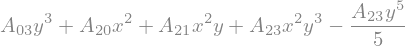

In [3]:
# Creamos la función de tensión de Airy 
phi = A20*x**2 + A21*x**2*y + A03*y**3 + A23*x**2*y**3 - A23*y**5/5
phi

In [4]:
# Definimos las constantes
t = 1
V = 0

In [5]:
# Definimmos una función para el biarmónico.
laplaciano = lambda f : sp.diff(f,x,2) + sp.diff(f,y,2)
# Definimos una función para el biarmónico a partir del laplaciano.
biarmonico = lambda f : laplaciano(laplaciano(f))

In [6]:
# Verificamos que la función de tensión de Airy es una función biarmónica.
biarmonico(phi)

In [7]:
# Calculamos los esfuerzos normales y cortantes.
sx  =  sp.diff(phi,y,2) + V
sy  =  sp.diff(phi,x,2) + V
txy = -sp.diff(phi,x,1,y,1)

In [8]:
# Definimos las funciones de fuerza cortante (V) y momento flector (M)
V = lambda xx: -sp.integrate(sp.integrate(txy.subs(x,xx)  , (z,0,t)), (y,-c,c))
M = lambda xx: -sp.integrate(sp.integrate( sx.subs(x,xx)*y, (z,0,t)), (y,-c,c))

# Calculamos
fax = sp.integrate(sp.integrate(sx, (z,0,t)), (y,-c,c))

In [9]:
e1 = txy.subs(y,+c) - 0
e2 = txy.subs(y,-c) - 0
e3 = sy.subs(y, +c) - q/t
e4 = sy.subs(y, -c) - 0

In [10]:
e5 = V(-L) - (-q*L)
e6 = V(+L) - (+q*L)
e7 = M(-L) - 0
e8 = M(+L) - 0
e9 = fax   - 0

In [11]:
# Encontramos el valor de cada constante
ctes = sp.solve([e1,e2,e3,e4,e5,e6,e7,e8,e9], [A20,A21,A03,A23])

In [12]:
# Reemplazamos en las expresiones para esfuerzos.
sx  = sp.factor( sx.subs([(A20, ctes[A20]), (A21, ctes[A21]), (A03, ctes[A03]), (A23, ctes[A23])]))
sy  = sp.factor( sy.subs([(A20, ctes[A20]), (A21, ctes[A21]), (A03, ctes[A03]), (A23, ctes[A23])]))
txy = sp.factor(txy.subs([(A20, ctes[A20]), (A21, ctes[A21]), (A03, ctes[A03]), (A23, ctes[A23])]))

In [13]:
imprimir(r"\sigma_x = ", sx)

<IPython.core.display.Math object>

In [14]:
imprimir(r"\sigma_y = ", sy)

<IPython.core.display.Math object>

In [15]:
imprimir(r"\tau_{xy} = ", txy)

<IPython.core.display.Math object>

In [16]:
# Se define el módulo de cortante
G = E/(2*(1+nu))

# Calculamos las deformaciones longitudinales y angulares
ex  = sp.factor((1/E)*(sx - nu*sy))
ey  = sp.factor((1/E)*(sy - nu*sx))
gxy = sp.factor((1/G)*txy)

In [17]:
imprimir(r"\varepsilon_x = ", ex)

<IPython.core.display.Math object>

In [18]:
imprimir(r"\varepsilon_y = ", ey)

<IPython.core.display.Math object>

In [19]:
imprimir(r"\gamma_{xy} = ", gxy)

<IPython.core.display.Math object>

In [20]:
df_dy_dg_dx = gxy - sp.diff(sp.integrate(ex,x),y) - sp.diff(sp.integrate(ey,y),x)

In [21]:
df_dy = sp.factor(sp.expand(df_dy_dg_dx.subs(x,0))) + w0

In [22]:
dg_dx = sp.factor(sp.expand(df_dy_dg_dx.subs(y,0))) - w0
imprimir(r"\frac{dg}{dx} = ", dg_dx)

<IPython.core.display.Math object>

In [23]:
f = sp.integrate(df_dy, y) + u0
g = sp.integrate(dg_dx, x) + v0

In [24]:
imprimir(r"f = ", f)

<IPython.core.display.Math object>

In [25]:
imprimir(r"g = ", g)

<IPython.core.display.Math object>

In [26]:
u = sp.integrate(ex, x) + f
v = sp.integrate(ey, y) + g

In [27]:
e1 = u.subs([(x, 0)])       - 0
e2 = v.subs([(x,+L),(y,0)]) - 0
e3 = v.subs([(x,-L),(y,0)]) - 0

In [28]:
ctes = sp.solve([e1,e2,e3],[u0, v0, w0])

In [29]:
u = sp.factor(u.subs([(u0, ctes[u0]),(v0, ctes[v0]),(w0, ctes[w0])]))
v = sp.factor(v.subs([(u0, ctes[u0]),(v0, ctes[v0]),(w0, ctes[w0])]))

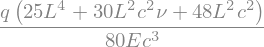

In [30]:
v.subs([(x,0), (y,0)])